Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Epoch 1/70
517/517 [==============================] - ETA: 0s - loss: 2.6368 - accuracy: 0.2848
Epoch 1: val_accuracy improved from -inf to 0.25352, saving model to best_model.h5
517/517 [==============================] - 444s 854ms/step - loss: 2.6368 - accuracy: 0.2848 - val_loss: 3.0290 - val_accuracy: 0.2535
Epoch 2/70


c:\Users\leand\OneDrive\Documentos\GitHub\Recognize-leaf-diseases\plant-disease-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


517/517 [==============================] - ETA: 0s - loss: 2.0730 - accuracy: 0.3433
Epoch 2: val_accuracy improved from 0.25352 to 0.41679, saving model to best_model.h5
517/517 [==============================] - 441s 853ms/step - loss: 2.0730 - accuracy: 0.3433 - val_loss: 2.1105 - val_accuracy: 0.4168
Epoch 3/70
517/517 [==============================] - ETA: 0s - loss: 1.8596 - accuracy: 0.3983
Epoch 3: val_accuracy did not improve from 0.41679
517/517 [==============================] - 442s 855ms/step - loss: 1.8596 - accuracy: 0.3983 - val_loss: 2.1783 - val_accuracy: 0.3583
Epoch 4/70
517/517 [==============================] - ETA: 0s - loss: 1.6987 - accuracy: 0.4714
Epoch 4: val_accuracy improved from 0.41679 to 0.52329, saving model to best_model.h5
517/517 [==============================] - 442s 855ms/step - loss: 1.6987 - accuracy: 0.4714 - val_loss: 1.6590 - val_accuracy: 0.5233
Epoch 5/70
517/517 [==============================] - ETA: 0s - loss: 1.5637 - accuracy: 0.4964

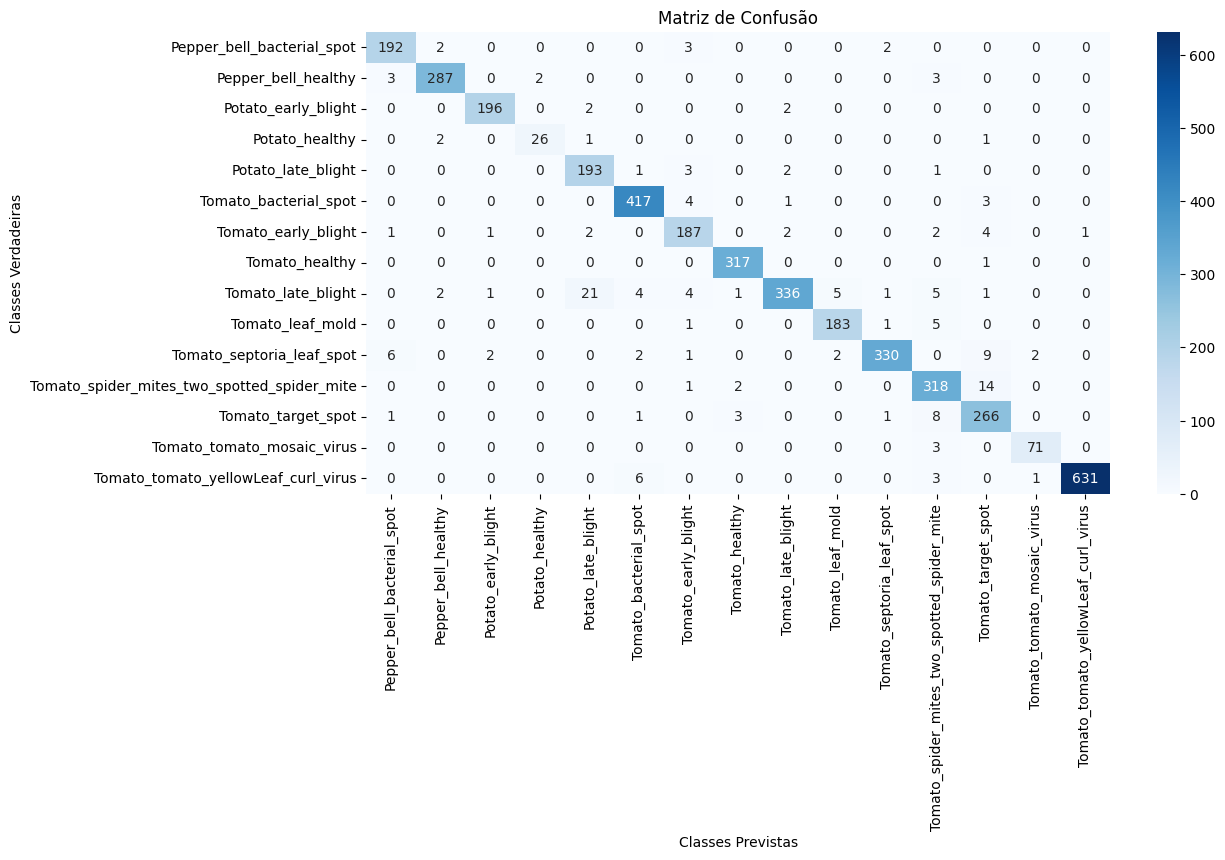

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Caminho do dataset
dataset_path = "PlantVillage"

# Gerador de imagens com aumento de dados (Data Augmentation)
datagen = ImageDataGenerator(
    rescale=1.0/255,  
    width_shift_range=0.2,  
    rotation_range=40, 
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    fill_mode="nearest",  
    brightness_range=[0.7, 1.3],  
    validation_split=0.2  
)

# Carregar dados de treinamento e validação
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False 
)

# Criando a CNN
model = keras.Sequential([
    # Primeira camada convolucional
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # Segunda camada convolucional
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # Terceira camada convolucional
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # Camada totalmente conectada (Densa)
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),  # Reduz overfitting

    # Camada de saída com softmax para classificação
    keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para salvar apenas o melhor modelo
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Treinamento do modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=70,
    callbacks=[checkpoint],
)

# Nome das classes
class_names = list(val_generator.class_indices.keys())

# Obter rótulos verdadeiros e previsões do modelo
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)

# Gerar relatório de classificação (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Mostrar Matriz de Confusão
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Classes Previstas")
plt.ylabel("Classes Verdadeiras")
plt.title("Matriz de Confusão")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()